#### Name List
* Jiayu ZHOU  
* Xiaochen YAN  
* Qinxuan ZHANG  
* Chang WANG  
* Shaobo ZHAO

###### Name List
* Jiayu ZHOU  
* Xiaochen YAN  
* Qinxuan ZHANG  
* Chang WANG  
* Shaobo ZHAO Exercise 1

In [177]:
import numpy as np

class Tax:
    '''
    Computes the taxes of firms under several tax brackets.
    '''
    def __init__(self, revenue, cost):
        "Initialize company with revenue and cost"
        self.revenue, self.cost=revenue, cost
        if revenue<cost:
            raise ValueError("Income is negative")
            
    def compute_income(self):
        "compute the income of the firm"
        self.income = self.revenue- self.cost
        return self.income
    
    def set_brackets(self,brackets=[0,1,2,5,10*10]):
        "Please set a large upper limit for the tax brackets."
        return self.brackets
    
    def set_percent(self,percent=[0.1,0.15,0.2,0.25]):
        return self.percent
    
    def compute_tax(self):
        brackets = self.set_brackets()
        percent = self.set_percent()
        income = self.compute_income()
        
        if len(percent)!=len(brackets)-1:
            print('the brackets are not matched with percent')
            
        temp=0
        ss=np.searchsorted(brackets,income)
        for i in range(ss):
            temp+=percent[i]*(min(brackets[i+1],income)-brackets[i])
        tax=temp   
        
        return float("{0:.2f}".format(tax))
        
    def compute_average_tax_rate(self):
        "compute the average tax rate of the firm"
        income  = self.compute_income()
        tax = self.compute_tax()
        return float("{0:.3f}".format(tax/income))
                 

In [175]:
Firm_1 = Tax(105,95)
print('Income:', Firm_1.compute_income(), 'Million')
print('Tax:', Firm_1.compute_tax(), 'Million')
print('Rate:', Firm_1.compute_average_tax_rate()*100, 'Percent')

Income: 10 Million
Tax: 2.1 Million
Rate: 21.0 Percent


In [176]:
Firm_2 = Tax(13,10)
print('Income:', Firm_2.compute_income(), 'Million')
print('Tax:', Firm_2.compute_tax(),'Million')
print('Rate:', Firm_2.compute_average_tax_rate()*100, 'Percent')

Income: 3 Million
Tax: 0.45 Million
Rate: 15.0 Percent


## Exercise 2

In [261]:
class Roulette:
    '''
    A simple roulette game
    '''

    house_earnings = 0
    

    def __init__(self, stash):
        self.stash = stash
        
    def roll(self):
        red = (1, 3, 5, 7, 9, 12,14, 16, 18, 19, 21, 23,25, 27, 30, 32, 34, 36)
        black = (2, 4, 6, 8, 10, 11,13, 15, 17, 20, 22, 24,26, 28, 29, 31, 33, 35)
        even = np.linspace(2,36,18)
        odd = np.linspace(1,35,18)
        types = {'O':odd,'E':even,'B':black,'R':red}
    
        bet_type = input("If straight up, just input the number between 0 and 36. O for odd, E for even. R for red, B for black. Choose bet type:")
       
        amount = int(input("Choose bet amount:"))
        if amount > self.stash:
            raise ValueError("Amout is too high")

        roll = int(np.random.uniform(0,36))
        print("You rolled {0}".format(roll))
        
        if bet_type.isdigit():
            bet_type = int(bet_type)
            if roll == bet_type:
                print("You win :)")
                self.stash = self.stash + 35 * amount
                Roulette.house_earnings = Roulette.house_earnings - 35 * amout
            else:
                print("You lose :(")
                self.stash = self.stash - amount
                Roulette.house_earnings = Roulette.house_earnings + amount
        else:
            if roll in types[bet_type]:
                print("You win :)")
                self.stash = self.stash + amount
                Roulette.house_earnings = Roulette.house_earnings - amount
            else:
                print("You lose :(")
                self.stash = self.stash - amount
                Roulette.house_earnings = Roulette.house_earnings - amount
                
        print("Current stash: {0}".format(self.stash))

    def add_money(self,add):
        self.stash += add
        return print("You added {0} into the stash. \nCurrent stash {1}".format(add, self.stash))
            
    def check_stash(self):
        return print("Current stash: {0}".format(self.stash))
        
    def check_house_earnings(self):
        return print("House earnings: {0}".format(Roulette.house_earnings))

In [262]:
Player_1 = Roulette(100)
Player_1.roll()

If straight up, just input the number between 0 and 36. O for odd, E for even. R for red, B for black. Choose bet type:E
Choose bet amount:20
You rolled 16
You win :)
Current stash: 120


In [263]:
Player_2 = Roulette(160)
Player_2.roll()

If straight up, just input the number between 0 and 36. O for odd, E for even. R for red, B for black. Choose bet type:2
Choose bet amount:10
You rolled 21
You lose :(
Current stash: 150


In [264]:
Player_1.add_money(20)

You added 20 into the stash. 
Current stash 140


In [265]:
Player_1.check_house_earnings()

House earnings: -10


## Exercise 3

In [3]:
import numpy as np
class ECDF:
    '''
    empirical cumulative distribution function
    '''
    
    def __init__(self,observations):
        self.observations = observations
        
    def __call__(self,x):
        obs = np.array(self.observations)
        return np.mean(obs<=x)
np.mean?

In [53]:
m = ECDF([1,2,3,3,3,4,4,4,5,6])
m(3)

0.5

## Exercise 4

In [242]:
class Polynomial:
    '''
    This class returns p(x) for any x, and differentiate the polynomial.
    '''
    
    def __init__(self,coefficients):
        self.coef=np.array(coefficients)
    
    def x_poly(self,x):    
        x = np.ones(len(self.coef))*x
        x[0]=1
        x= np.cumprod(x)
        return x
    
    def p(self,x):
        y = self.x_poly(x)
        return y @ self.coef
    
    def derivative(self,x):
        self.coef = self.coef * np.array(range(len(self.coef)))
        y = self.x_poly(x)/x
        return y @ self.coef

In [243]:
n = Polynomial([1,2,3,4])
n.p(2)

49.0

In [244]:
n.derivative(2)

62.0

In [245]:
#An alternative method: No imports and give x value in initialization
class Polynomial:
    
    def __init__(self,x,coef):
        self.x, self.coef = x, coef
    
    def p(self):
        return sum(a * self.x**i for i, a in enumerate(self.coef))
    
    def diff(self):
        return sum(a*i*self.x**(i-1) for i,a in enumerate(self.coef))

In [246]:
n = Polynomial(2,[1,2,3,4])
n.p()

49

In [247]:
n.diff()

62.0

## DDP Exercise 1

258


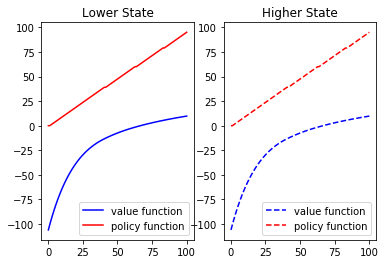

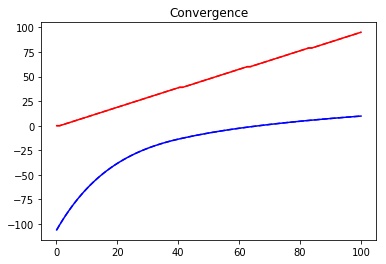

Time elapsed:  1.7671010494232178


In [248]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

beta = 0.95 
num_points = 100
tol = 10**(-5) 

w_vec = np.reshape(np.linspace(0.1,100,num_points),num_points)

wprime = w_vec-0.005 

mar=np.array([[0.9,0.1],[0.4,0.6]])

value_old_l = np.ones(num_points) 
value_new_l = np.zeros(num_points) 
value_old_h = np.ones(num_points) 
value_new_h = np.zeros(num_points) 
policy_l = np.zeros(num_points) 
policy_h = np.zeros(num_points)
ctr = 0 

while(np.max(np.abs(value_old_l-value_new_l)) > tol and np.max(np.abs(value_old_h-value_new_h)) > tol): 
    np.copyto(value_old_l,value_new_l) 
    np.copyto(value_old_h,value_new_h)
    for ii in np.arange(num_points): 
        value_new_l[ii] = np.max(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*mar[0,0]*value_old_l[wprime<=w_vec[ii]]\
                               +beta*mar[0,1]*value_old_h[wprime<=w_vec[ii]])
        value_new_h[ii] = np.max(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*mar[1,0]*value_old_l[wprime<=w_vec[ii]]\
                               +beta*mar[1,1]*value_old_h[wprime<=w_vec[ii]])
        policy_l[ii] = np.argmax(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*mar[0,0]*value_old_l[wprime<=w_vec[ii]]\
                               +beta*mar[0,1]*value_old_h[wprime<=w_vec[ii]])
        policy_h[ii] = np.argmax(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*mar[1,0]*value_old_l[wprime<=w_vec[ii]]\
                               +beta*mar[1,1]*value_old_h[wprime<=w_vec[ii]])
    ctr = ctr+1 

print(ctr)

fig,(ax1, ax2)=plt.subplots(1,2)

ax1.plot(w_vec, value_new_l, 'b-', label='value function')
ax2.plot(w_vec, value_new_h, 'b--', label='value function')
ax1.plot(w_vec, policy_l, 'r-', label='policy function')
ax2.plot(w_vec, policy_h, 'r--', label='policy function')
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax1.set_title("Lower State")
ax2.set_title("Higher State")
plt.show()

fig, ax=plt.subplots()
ax.plot(w_vec, value_new_l, 'b-', label='value function')
ax.plot(w_vec, value_new_h, 'b--', label='value function')
ax.plot(w_vec, policy_l, 'r-', label='policy function')
ax.plot(w_vec, policy_h, 'r--', label='policy function')
ax.set_title("Convergence")
plt.show()

end = time.time()
print('Time elapsed: ', end-start)